# Prediction (out of sample)

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import statsmodels.api as sm

## Artificial data

In [3]:
nsample = 50
sig = 0.25
x1 = np.linspace(0, 20, nsample)
X = np.column_stack((x1, np.sin(x1), (x1-5)**2))
X = sm.add_constant(X)
beta = [5., 0.5, 0.5, -0.02]
y_true = np.dot(X, beta)
y = y_true + sig * np.random.normal(size=nsample)

## Estimation 

In [4]:
olsmod = sm.OLS(y, X)
olsres = olsmod.fit()
print(olsres.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.980
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                     754.1
Date:                Fri, 21 Feb 2020   Prob (F-statistic):           4.21e-39
Time:                        13:57:24   Log-Likelihood:                -4.1308
No. Observations:                  50   AIC:                             16.26
Df Residuals:                      46   BIC:                             23.91
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.0831      0.093     54.429      0.0

## In-sample prediction

In [5]:
ypred = olsres.predict(X)
print(ypred)

[ 4.61036341  5.09172228  5.53276677  5.90507171  6.19047043  6.38403949
  6.49490757  6.54475568  6.56425502  6.58802778  6.64895881  6.77279276
  6.97390428  7.25293632  7.59669448  7.98031483  8.37134897  8.73509521
  9.04029999  9.2642927   9.39671042  9.44120056  9.41482152  9.3452401
  9.26618593  9.21190973  9.21155609  9.28437501  9.43655927  9.6602269
  9.93471621 10.22998043 10.5115243  10.74607157 10.90703217 10.97887089
 10.95965979 10.86139491 10.70802541 10.53151874 10.36660852 10.24508788
 10.19058594 10.21468562 10.31502061 10.47566411 10.6697456  10.86386558
 11.02358297 11.11907377]


## Create a new sample of explanatory variables Xnew, predict and plot

In [6]:
x1n = np.linspace(20.5,25, 10)
Xnew = np.column_stack((x1n, np.sin(x1n), (x1n-5)**2))
Xnew = sm.add_constant(Xnew)
ynewpred =  olsres.predict(Xnew) # predict out of sample
print(ynewpred)

[11.11980579 10.98378856 10.73147613 10.40948069 10.07916026  9.80159615
  9.62263807  9.56167858  9.60690506  9.71819191]


## Plot comparison

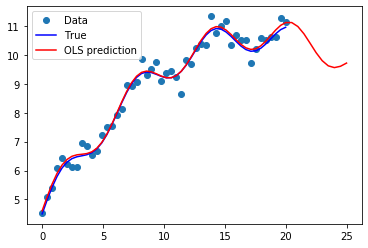

In [7]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(x1, y, 'o', label="Data")
ax.plot(x1, y_true, 'b-', label="True")
ax.plot(np.hstack((x1, x1n)), np.hstack((ypred, ynewpred)), 'r', label="OLS prediction")
ax.legend(loc="best");

## Predicting with Formulas

Using formulas can make both estimation and prediction a lot easier

In [8]:
from statsmodels.formula.api import ols

data = {"x1" : x1, "y" : y}

res = ols("y ~ x1 + np.sin(x1) + I((x1-5)**2)", data=data).fit()

We use the `I` to indicate use of the Identity transform. Ie., we do not want any expansion magic from using `**2`

In [9]:
res.params

Intercept           5.083128
x1                  0.490733
np.sin(x1)          0.521571
I((x1 - 5) ** 2)   -0.018911
dtype: float64

Now we only have to pass the single variable and we get the transformed right-hand side variables automatically

In [10]:
res.predict(exog=dict(x1=x1n))

0    11.119806
1    10.983789
2    10.731476
3    10.409481
4    10.079160
5     9.801596
6     9.622638
7     9.561679
8     9.606905
9     9.718192
dtype: float64